<a href="https://colab.research.google.com/github/bryantravissmith/Causality-Pearl-Notes/blob/master/Causality_Pearl_Ch2_A_Theory_of_Inferred_Causation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

tf.enable_eager_execution()

# A Theory of Inferred Causation

Key Question: Can the difference in these structures be used to infer causal influences in the data generation process:  
$$ 1. \ X \xrightarrow{} Y  \xrightarrow{} Z $$
$$ 2. \ X \xrightarrow{} Y  \xleftarrow{} Z $$
$$ 3. \ X \xleftarrow{} Y  \xrightarrow{} Z $$



In [0]:
X1 = tf.random.normal(shape=(100,))
Y1 = tf.random.normal(shape=(100,)) + X1
Z1 = tf.random.normal(shape=(100,)) + Y1

X2 = tf.random.normal(shape=(100,))
Z2 = 3*tf.random.normal(shape=(100,))
Y2 = X2 + Z2/3

Y3 = tf.random.normal(shape=(100,))
Z3 = 2*tf.random.normal(shape=(100,)) + Y3
X3 = 0.5*tf.random.normal(shape=(100,)) + 0.5*Y3

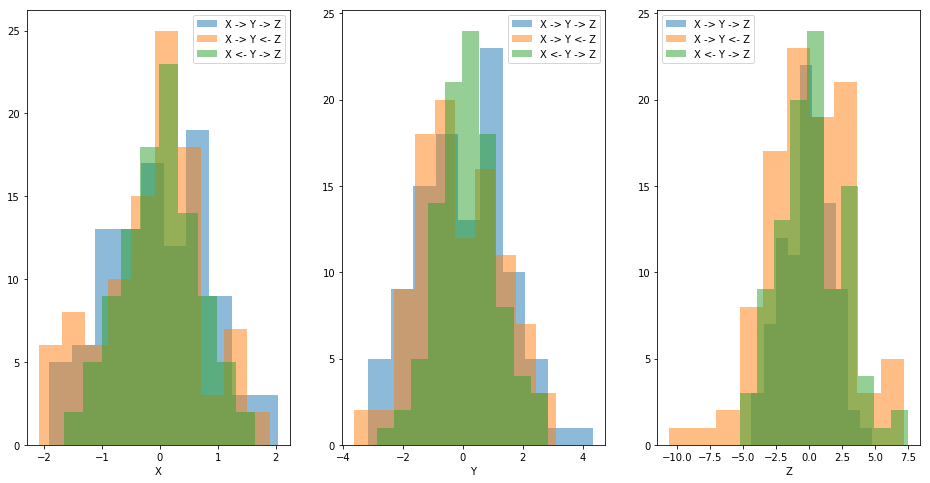

In [19]:
plt.figure(figsize=(16,8))

ax=plt.subplot(1,3,1)
plt.title('')
plt.hist(X1.numpy(), alpha=0.5, label='X -> Y -> Z')
plt.hist(X2.numpy(), alpha=0.5, label='X -> Y <- Z')
plt.hist(X3.numpy(), alpha=0.5, label='X <- Y -> Z')
plt.xlabel('X')
plt.legend()

ax=plt.subplot(1,3,2)
plt.hist(Y1.numpy(), alpha=0.5, label='X -> Y -> Z')
plt.hist(Y2.numpy(), alpha=0.5, label='X -> Y <- Z')
plt.hist(Y3.numpy(), alpha=0.5, label='X <- Y -> Z')
plt.xlabel('Y')
plt.legend()

ax=plt.subplot(1,3,3)
plt.hist(Z1.numpy(), alpha=0.5, label='X -> Y -> Z')
plt.hist(Z2.numpy(), alpha=0.5, label='X -> Y <- Z')
plt.hist(Z3.numpy(), alpha=0.5, label='X <- Y -> Z')
plt.xlabel('Z')
plt.legend()
plt.show()

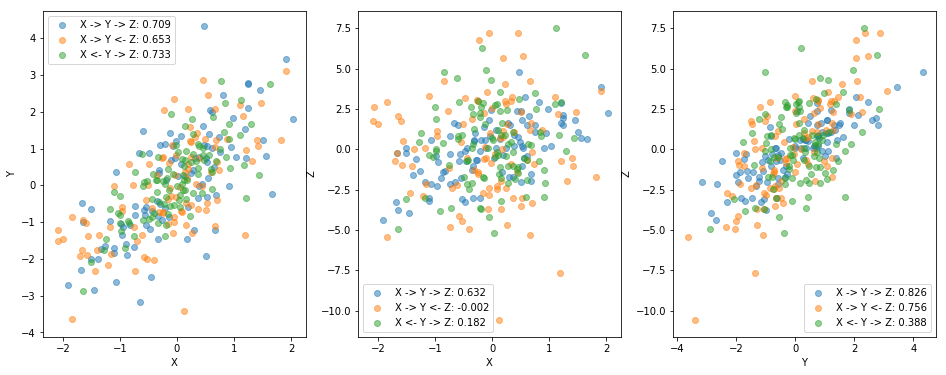

In [18]:
plt.figure(figsize=(16,6))

ax=plt.subplot(1,3,1) 
plt.scatter(X1, Y1, alpha=0.5, label='X -> Y -> Z: {}'.format(np.round(np.corrcoef(X1,Y1)[0,1],3)))
plt.scatter(X2, Y2, alpha=0.5, label='X -> Y <- Z: {}'.format(np.round(np.corrcoef(X2,Y2)[0,1],3)))
plt.scatter(X3, Y3, alpha=0.5, label='X <- Y -> Z: {}'.format(np.round(np.corrcoef(X3,Y3)[0,1],3)))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

ax=plt.subplot(1,3,2) 
plt.scatter(X1, Z1, alpha=0.5, label='X -> Y -> Z: {}'.format(np.round(np.corrcoef(X1,Z1)[0,1],3)))
plt.scatter(X2, Z2, alpha=0.5, label='X -> Y <- Z: {}'.format(np.round(np.corrcoef(X2,Z2)[0,1],3)))
plt.scatter(X3, Z3, alpha=0.5, label='X <- Y -> Z: {}'.format(np.round(np.corrcoef(X3,Z3)[0,1],3)))
plt.xlabel('X')
plt.ylabel('Z')
plt.legend()

ax=plt.subplot(1,3,3) 
plt.scatter(Y1, Z1, alpha=0.5, label='X -> Y -> Z: {}'.format(np.round(np.corrcoef(Y1,Z1)[0,1],3)))
plt.scatter(Y2, Z2, alpha=0.5, label='X -> Y <- Z: {}'.format(np.round(np.corrcoef(Y2,Z2)[0,1],3)))
plt.scatter(Y3, Z3, alpha=0.5, label='X <- Y -> Z: {}'.format(np.round(np.corrcoef(Y3,Z3)[0,1],3)))
plt.legend()
plt.xlabel('Y')
plt.ylabel('Z')

plt.show()

The fact that X and Z are uncorrelated, but are both strongly correlated to why for the causal graph $X \xrightarrow{} Y  \xleftarrow{} Z$ suggests that we can potential infer from the correlation of $X$ and $Z$ with Y but with each outher that $X$ and $Z$ are causal of $Y$.  

## Defintion - Causal Structure 

A causal strucutre of a set of variables $V$ is a directed asyclic graph (DAG) in which each node corresponds to a distance element of $V$, and each link represents a direct functional relationship among the corresponding variables

## Definition - Causal Model

A causal model is a pair $M = \left<D, \Theta_D\right>$ consisting of a causal structure $D$ and a set of parameters $\Theta_D$ compatible with D.  The parameters $\Theta_D$ assign a function $x_i = f_i\left(pa_i, u_i\right)$ for each $X_i \in D$ where each $U_i$ is a random disturbance distribution accroding to $P\left(u_i\right)$, independently of all other $u$.

# Model Preferences 

## Definition - Inferred Causation
A variable X is said to have a causal influence on a variable Y if a directed path from X to Y exists in every minimal structure consistent with the data

## Definition - Latent Structure
A latent strucutre is a pair $L = \left<D, O\right>$ where $D$ is a causal structure over $V$ and where $O \subseteq V$ is a set of observed variables

## Definition - Structure Preference
One latent structure $L = \left<D, O\right>$ is preferred to another $L' = \left<D', O\right>$ (written $L \preceq L'$) if an donly if $D'$ can mimic $D$ over $O$ - that is, if and only if for every $\Theta_D$ there exists a $\Theta_D'$ such that $P_{[O]}\left(\left<D', \Theta_D'\right>\right) = P_{[O]}\left(\left<D', \Theta_D\right>\right)$.  Two latent structures are equivalent, written $L' \equiv L$ if and only if $L \preceq L'$ and $L \succeq L'$

## Definition - Minimality

## Definition - Consistency

## Definition - Inferred Causation